In [1]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [50]:
description = "Nikkor-Z-58mmf0.95-WO2019229849A1"
columns = "type distance roc diameter material"

# A was 45.8 - changed to 44.6 to get F 0.9799
text = """
O 0         0        100.0    AIR
S 30.0      108.488     64.8    1.902650/35.77
S 7.65    -848.550     63.4    1.552981/55.07
S 2.8       50.252     56.0    AIR
S 18.12    -60.720     56.5    1.612660/44.46
S 2.8     2497.5       63.4    1.59319/67.9
S 9.15     -77.239     63.4    AIR       
S 0.40     113.763     68.3    1.8485/43.79
S 10.95   -178.06      68.3    AIR
S 0.4       70.659     62.5    1.59319/67.9
S 9.74   -1968.5       62.5    AIR         
S 0.2      289.687     58.7    1.59319/67.9
S 8.0      -97.087     57.2    1.738/32.33  
S 2.8       47.074     48.3    AIR
A 8.7        0         44.6    AIR
S 5.29     -95.230     48.1    1.612660/44.46
S 2.2       41.204     48.1    1.497820/82.57
S 11.55   -273.092     48.1    AIR         
S 0.2       76.173     49.4    1.883/40.69
S 9.5     -101.575     49.4    AIR          
S 0.20     176.128     45.3    1.953750/32.33
S 7.45     -67.221     44.1    1.738/32.33  
S 1.8       55.51      38.1    AIR
S 21.29     71.413     38.1    1.883/40.69
S 6.35    -115.025     38.1    1.69895/30.13
S 1.81      46.943     38.1    AIR
S 0.8       55.281     38.0    1.883/40.69
S 9.11    -144.041     37.6    1.765538/46.76
S 3.0       52.858     37.1    AIR   
S 14.5      0          42.9    1.5168/64.14
S 1.6       0          42.9    AIR
I 1.0       0          43.4    AIR
"""


In [38]:
# This is broken as we need to specify a FiniteConjugate as the object
# wavelengths=[588e-9],
s = ro.system_from_text(text, columns.split(),
    description=description)
# s.object.angle = np.deg2rad(20.0)
s.object.angle = np.deg2rad(16.01)


## Aspheric data
s[1].conic      = 0.0
s[1].aspherics  = [0, -3.82177E-07, -6.06486E-11, -3.80172E-15, -1.32266E-18]
s[20].conic     = 0.0
s[20].aspherics = [0, -1.15028E-06, -4.51771E-10, 2.72670E-13, -7.66812E-17]
s[28].conic     = 0.0
s[28].aspherics = [0, 3.18645E-06, -1.14718E-08, 7.74567E-11, -2.24225E-13, 3.34790E-16, -1.70470E-19]

s.fields = 0, .7, 1.

In [39]:
s.update()
print(s)

System: Nikkor-Z-58mmf0.95-WO2019229849A1
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 16 deg
 Pupil:
   Pupil Distance: 99.2967
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 30.437
Image:
 Radius: 21.7
 Update Radius: True
 Pupil:
   Pupil Distance: -71.1274
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 28.5846
Stop: 14
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        100         basic/air   1.000   1.000   89.30
 1 S         30      108.5       64.8                 -   1.903   1.903   35.77
 2 S       7.65     -848.5       63.4                 -   1.553   1.553   55.07
 3 S        2.8      50.25         56         basic/air   1.000   1.000   89.30
 4 S      18.12     -60.72       56.5                 -   1.613   1.613   44.46
 5 S        2.8       2498       63.4                 -   1.593   1.593   67.90
 6 S       9.15     -77.24       63

AssertionError: 

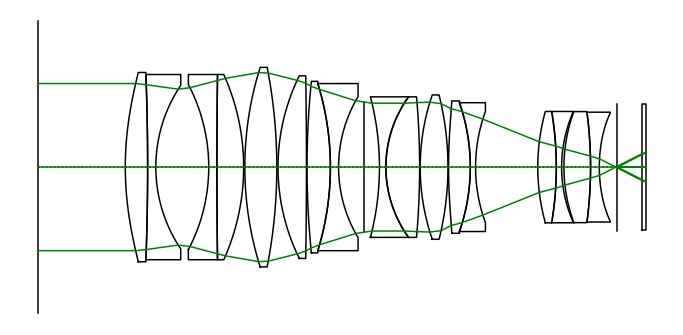

In [33]:
ro.Analysis(s)